In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('car driving risk analysis.csv')

In [ ]:
df

,speed,risk
0,200,95
1,90,20
2,300,98
3,110,60
4,240,72
5,115,10
6,50,7
7,230,85
8,190,45
9,260,91


In [ ]:
df.head(15)

,speed,risk
0,200,95
1,90,20
2,300,98
3,110,60
4,240,72
5,115,10
6,50,7
7,230,85
8,190,45
9,260,91


In [ ]:
df.shape #for checking the shape

(15, 2)

In [ ]:
df.isnull().any() #for find out any null value is exist or not

speed    False
risk     False
dtype: bool

In [ ]:
df.isnull().sum() #making the integer value summetion of null value

speed    0
risk     0
dtype: int64

[]

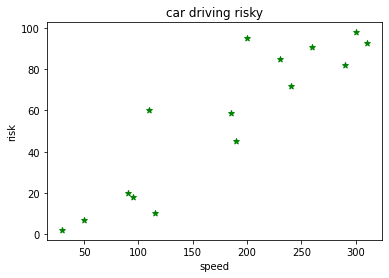

In [ ]:
plt.xlabel('speed') #for x axis Area sqft
plt.ylabel('risk') #for y axis price
plt.scatter(df['speed'], df['risk'],color='green', marker='*') #This code will determine how plotted data will show such in my case its star and green
plt.title('car driving risky') #Heading of ploting
plt.plot()

In [ ]:
# Separating dependent and independent variable
x = df['speed']
y = df['risk']

In [ ]:
x

0     200
1      90
2     300
3     110
4     240
5     115
6      50
7     230
8     190
9     260
10    290
11    185
12    310
13     95
14     30
Name: speed, dtype: int64

In [ ]:
y

0     95
1     20
2     98
3     60
4     72
5     10
6      7
7     85
8     45
9     91
10    82
11    59
12    93
13    18
14     2
Name: risk, dtype: int64

# **Splitting Data set**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.65, random_state =1) #test_size=60% means 30% of my data will be collected for testing


In [ ]:
xtrain

9     260
8     190
12    310
11    185
5     115
Name: speed, dtype: int64

In [ ]:
xtest

3     110
7     230
6      50
2     300
10    290
4     240
1      90
13     95
0     200
14     30
Name: speed, dtype: int64

X has 2 dimensions, where as, your xtrain and xtest clearly have one.
> Before fitting and predicting the model.

In [ ]:
#This extracts a numpy array with the values of your pandas Series object and then reshapes it to a 2D array.
#The reason need to do this is that pandas Series objects are by design one dimensional.
xtrain= xtrain.values.reshape(-1, 1)
ytrain= ytrain.values.reshape(-1, 1)
xtest = xtest.values.reshape(-1, 1)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression() #object creation

In [ ]:
reg.fit(xtrain, ytrain)

LinearRegression()

In [ ]:
reg.predict(xtest)

array([[ 14.64846871],
       [ 67.53262317],
       [-11.79360852],
       [ 98.38171327],
       [ 93.9747004 ],
       [ 71.93963604],
       [  5.83444296],
       [  8.0379494 ],
       [ 54.31158455],
       [-20.60763427]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


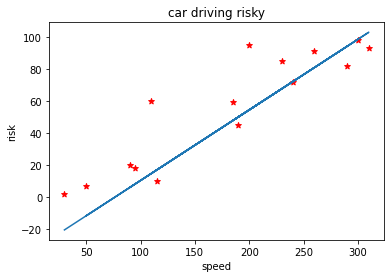

In [ ]:
plt.xlabel('speed') #for x axis Area sqft
plt.ylabel('risk') #for y axis price
plt.scatter(df['speed'], df['risk'],color='red', marker='*') #This code will determine how plotted data will show such in my case its star and green
plt.title('car driving risky') #Heading of ploting
plt.plot(df.speed,reg.predict(df[['speed']])) #best fit line

In [ ]:
reg.predict([[350]])

array([[120.41677763]])

In [ ]:
reg.score(xtest,ytest) #Accuracy

0.5930914960414264

In [ ]:
from sklearn.metrics import r2_score

pred = reg.predict(xtest)
score=r2_score(ytest,pred)

score #Answer

0.5930914960414264

In [ ]:
reg.intercept_

array([-33.82867288])

In [ ]:
reg.coef_

array([[0.44070129]])

In [ ]:
y = 0.37230718*350 -17.63580452
y

112.67170848

In [ ]:
reg.predict([[280]])

array([[89.56768753]])